#  EMF RBM Omniglot

### Binarized, 20 Epochs, faster learning rate

Look at different ways of computing the

- energy density
- free energy density
- entropy density

We can

- use the TAP S and MF Energy *U_naive   
    - which takes an equlibration step first  
    - S(mv, mh), U_naive(mv, mh)
- use a simple h = means_hiddens() step
    - S(v, h), E_MF(v, h)


In [3]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import psutil

/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.datasets import fetch_mldata
from sklearn.utils.validation import assert_all_finite
from scipy.sparse import csc_matrix, csr_matrix, lil_matrix
from sklearn.preprocessing import Binarizer
np.seterr(all='warn')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [5]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl

def show_image(image): 
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    plt.show()

In [6]:
import rbm_datasets

In [7]:
train_x, train_y, train_char, test_x, test_y, test_char = rbm_datasets.load_omniglot_iwae()

In [8]:
from sklearn.preprocessing import binarize
X_train = binarize(train_x, threshold=0.5, copy=True)

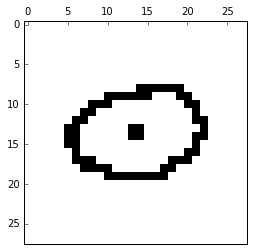

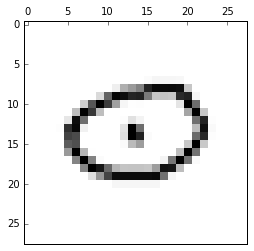

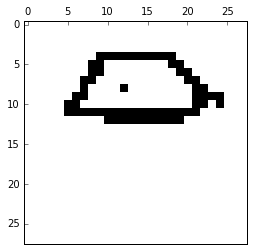

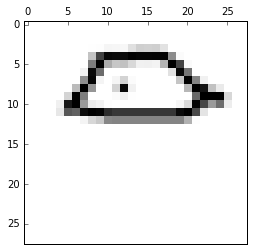

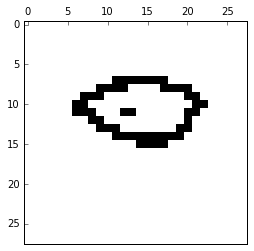

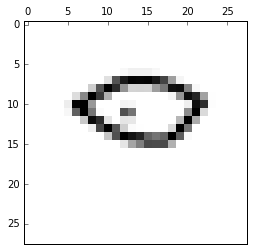

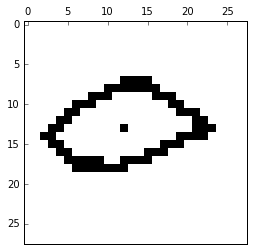

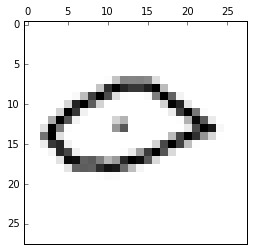

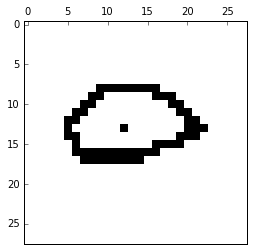

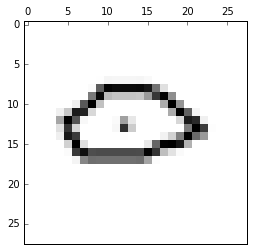

In [9]:
for i in range(5):
    show_image(X_train[i+100].reshape(28,28))
    show_image(train_x[i+100].reshape(28,28))

In [10]:
X_train.shape

(24345, 784)

In [11]:
from sklearn.preprocessing import binarize
X_test = binarize(test_x, threshold=0.5, copy=True)

### EMF RBM

In [16]:
psutil.swap_memory()

sswap(total=7516192768L, used=6640107520L, free=876085248L, percent=88.3, sin=69141757952L, sout=937185280L)

### mean Entropy, Energy, and Free Energy

In [17]:
import emf_rbm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [18]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True, learning_rate=0.1, n_iter=20, batch_size=10, weight_decay='L2')
print rbm
rbm= rbm.fit(X_train)

F_train = rbm.transform(X_train)
F_test = rbm.transform(X_test)

classifier = LinearSVC(C=1.0)
classifier.fit(F_train, train_y)
pred_y = classifier.predict(F_test)
emf_accuracy = accuracy_score(y_pred=pred_y, y_true=test_y)
print classifier, emf_accuracy

EMF_RBM(batch_size=10, decay=0.01, learning_rate=0.1, momentum=0.5,
    monitor=True, n_components=256, n_iter=20, neq_steps=3,
    random_state=<mtrand.RandomState object at 0x106f88780>, sigma=0.001,
    thresh=1e-08, verbose=True, weight_decay='L2')
[EMF_RBM] Iteration 1, pseudo-likelihood = -90.53, time = 21.79s
computing TAP Free Energies
monitor:  -180.078246121 177.551250361 17.9152196109
[EMF_RBM] Iteration 2, pseudo-likelihood = -82.12, time = 33.28s
computing TAP Free Energies
monitor:  -228.630725252 172.268346144 -30.9769599567
[EMF_RBM] Iteration 3, pseudo-likelihood = -80.19, time = 31.68s
computing TAP Free Energies
monitor:  -247.432974109 170.183320717 -49.984954656
[EMF_RBM] Iteration 4, pseudo-likelihood = -74.19, time = 30.73s
computing TAP Free Energies
monitor:  -252.029424929 169.697224142 -54.0902980932
[EMF_RBM] Iteration 5, pseudo-likelihood = -73.72, time = 30.26s
computing TAP Free Energies
monitor:  -256.362866776 168.891716606 -58.8176604653
[EMF_RBM] Iter

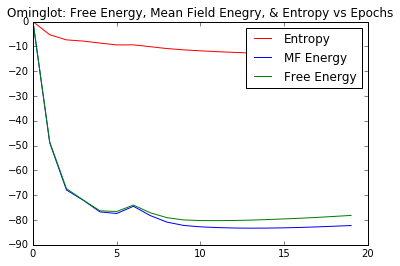

In [19]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red', label='Entropy')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue', label='MF Energy')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green', label='Free Energy')
plt.legend(loc='upper right')
plt.title("Ominglot: Free Energy, Mean Field Enegry, & Entropy vs Epochs")

### variations

In [20]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True, learning_rate=0.1, n_iter=20, batch_size=10, weight_decay='L1')
print rbm
rbm= rbm.fit(X_train)

F_train = rbm.transform(X_train)
F_test = rbm.transform(X_test)

classifier = LinearSVC(C=1.0)
classifier.fit(F_train, train_y)
pred_y = classifier.predict(F_test)
emf_accuracy = accuracy_score(y_pred=pred_y, y_true=test_y)
print classifier, emf_accuracy

EMF_RBM(batch_size=10, decay=0.01, learning_rate=0.1, momentum=0.5,
    monitor=True, n_components=256, n_iter=20, neq_steps=3,
    random_state=<mtrand.RandomState object at 0x106f88780>, sigma=0.001,
    thresh=1e-08, verbose=True, weight_decay='L1')
[EMF_RBM] Iteration 1, pseudo-likelihood = -96.73, time = 21.79s
computing TAP Free Energies
monitor:  -173.167167942 193.478844542 39.4345376386
[EMF_RBM] Iteration 2, pseudo-likelihood = -80.02, time = 31.63s
computing TAP Free Energies
monitor:  -217.669685817 180.461384227 -11.7198988386
[EMF_RBM] Iteration 3, pseudo-likelihood = -76.30, time = 31.09s
computing TAP Free Energies
monitor:  -237.353947183 174.626540005 -34.2591192441
[EMF_RBM] Iteration 4, pseudo-likelihood = -72.96, time = 30.92s
computing TAP Free Energies
monitor:  -247.360124844 171.464891367 -45.8884253173
[EMF_RBM] Iteration 5, pseudo-likelihood = -70.17, time = 31.12s
computing TAP Free Energies
monitor:  -252.85067821 169.249801242 -52.7695618073
[EMF_RBM] Iter

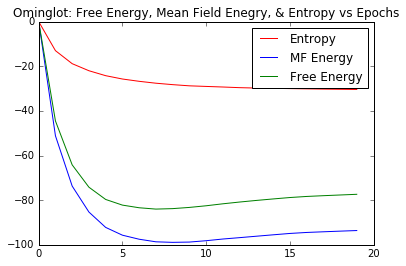

In [21]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red', label='Entropy')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue', label='MF Energy')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green', label='Free Energy')
plt.legend(loc='upper right')
plt.title("Ominglot: Free Energy, Mean Field Enegry, & Entropy vs Epochs")

In [22]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True, learning_rate=0.1, n_iter=100, batch_size=10, weight_decay='L1', decay=0.5 )
print rbm
rbm= rbm.fit(X_train)

F_train = rbm.transform(X_train)
F_test = rbm.transform(X_test)

classifier = LinearSVC(C=1.0)
classifier.fit(F_train, train_y)
pred_y = classifier.predict(F_test)
emf_accuracy = accuracy_score(y_pred=pred_y, y_true=test_y)
print classifier, emf_accuracy

EMF_RBM(batch_size=10, decay=0.5, learning_rate=0.1, momentum=0.5,
    monitor=True, n_components=256, n_iter=100, neq_steps=3,
    random_state=<mtrand.RandomState object at 0x106f88780>, sigma=0.001,
    thresh=1e-08, verbose=True, weight_decay='L1')
[EMF_RBM] Iteration 1, pseudo-likelihood = -177.20, time = 21.28s
computing TAP Free Energies
monitor:  -126.876431543 301.70528613 174.892402673
[EMF_RBM] Iteration 2, pseudo-likelihood = -174.57, time = 30.60s
computing TAP Free Energies
monitor:  -123.835677423 298.341754527 174.566159317
[EMF_RBM] Iteration 3, pseudo-likelihood = -172.51, time = 30.88s
computing TAP Free Energies
monitor:  -121.368673483 294.932780093 173.622717564
[EMF_RBM] Iteration 4, pseudo-likelihood = -174.08, time = 30.69s
computing TAP Free Energies
monitor:  -115.731748899 286.478689788 170.800348911
[EMF_RBM] Iteration 5, pseudo-likelihood = -175.43, time = 30.70s
computing TAP Free Energies
monitor:  -112.080512174 280.860350633 168.830220505
[EMF_RBM] Ite

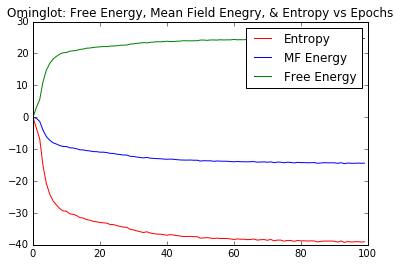

In [23]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red', label='Entropy')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue', label='MF Energy')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green', label='Free Energy')
plt.legend(loc='upper right')
plt.title("Ominglot: Free Energy, Mean Field Enegry, & Entropy vs Epochs")

In [24]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True, neq_steps=10, learning_rate=0.1, n_iter=100, batch_size=10, weight_decay='L1', decay=0.5 )
print rbm
rbm= rbm.fit(X_train)

F_train = rbm.transform(X_train)
F_test = rbm.transform(X_test)

classifier = LinearSVC(C=1.0)
classifier.fit(F_train, train_y)
pred_y = classifier.predict(F_test)
emf_accuracy = accuracy_score(y_pred=pred_y, y_true=test_y)
print classifier, emf_accuracy

EMF_RBM(batch_size=10, decay=0.5, learning_rate=0.1, momentum=0.5,
    monitor=True, n_components=256, n_iter=100, neq_steps=10,
    random_state=<mtrand.RandomState object at 0x106f88780>, sigma=0.001,
    thresh=1e-08, verbose=True, weight_decay='L1')
[EMF_RBM] Iteration 1, pseudo-likelihood = -176.27, time = 35.99s
computing TAP Free Energies
monitor:  -119.9534535 293.294947637 173.398776247
[EMF_RBM] Iteration 2, pseudo-likelihood = -171.71, time = 59.15s
computing TAP Free Energies
monitor:  -113.99841355 284.159026126 170.213003753
[EMF_RBM] Iteration 3, pseudo-likelihood = -173.02, time = 58.27s
computing TAP Free Energies
monitor:  -109.328370023 276.606591488 167.326383633
[EMF_RBM] Iteration 4, pseudo-likelihood = -173.47, time = 57.65s
computing TAP Free Energies
monitor:  -106.917050171 272.492940322 165.620963106
[EMF_RBM] Iteration 5, pseudo-likelihood = -171.81, time = 58.37s
computing TAP Free Energies
monitor:  -105.215383263 269.603514864 164.431522918
[EMF_RBM] Iter

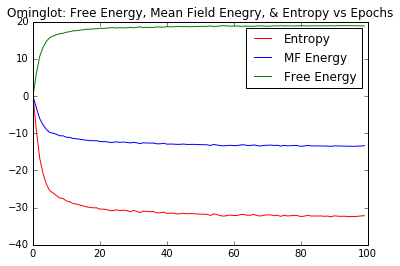

In [25]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red', label='Entropy')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue', label='MF Energy')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green', label='Free Energy')
plt.legend(loc='upper right')
plt.title("Ominglot: Free Energy, Mean Field Enegry, & Entropy vs Epochs")